作业1:• 单位平方度内，有多少r<20.5 mag 的星系？ • SDSS给出的本地星系的Schechter光度函数的参数为Mr*=-20.83，α=-1.0，请问单位体积范围内Mr=-16 mag的星系数目是Mr=-22mag星系数目的多少倍？SDSS是星等极限样本（r<17.77）,请问在SDSS的观测样本中，Mr=-22 mag的星系数目是Mr=-16mag星系数目的多少倍？ • 根据以上光度函数，画出一个Mr=20 mag星系的红移分布概率不考虑星系的K改正和演化效应

Number density of galaxies with r < 20.5 mag: 4.17e+00 per steradian
Ratio of galaxy counts (M_r = -16 / M_r = -22): 18.65


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21756\3770505998.py:31: RuntimeWarning: divide by zero encountered in log10
  return m - 5 * np.log10(d_l * 1e6) + 5


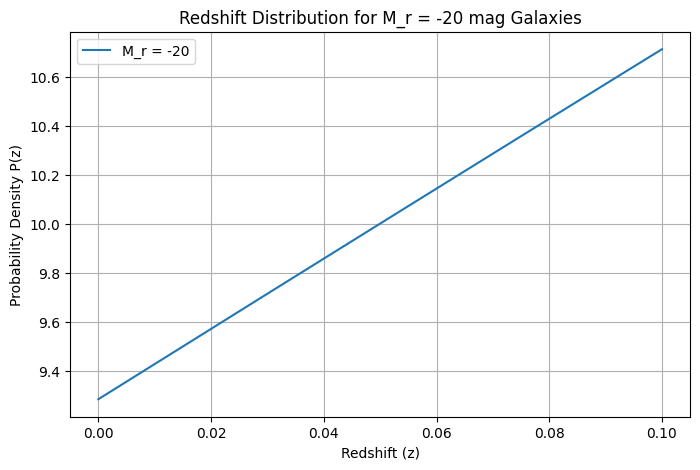

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Schechter luminosity function parameters
M_star = -20.83  # SDSS Mr*
alpha = -1.0  # Faint-end slope
phi_star = 0.01  # Normalization (Mpc^-3)

# Constants
H0 = 70  # Hubble constant (km/s/Mpc)
c = 3e5  # Speed of light (km/s)

# Function to calculate the Schechter luminosity function
def schechter_function(M, M_star, alpha, phi_star):
    term = 10**(0.4 * (M_star - M))
    return 0.4 * np.log(10) * phi_star * term**(1 + alpha) * np.exp(-term)

# Function to calculate comoving volume element (dV/dz in Mpc^3 per steradian)
def comoving_volume_element(z, H0, Omega_m=0.3, Omega_L=0.7):
    """Comoving volume element per unit redshift per steradian."""
    Ez = np.sqrt(Omega_m * (1 + z)**3 + Omega_L)
    dV_dz = c / H0 * (1 + z)**2 / Ez
    return dV_dz

# 1. Number of galaxies with r < 20.5 mag
def number_density_r_limit(m_limit, M_star, alpha, phi_star, z_max):
    """Calculate the number density of galaxies with apparent magnitude limit."""
    def absolute_magnitude_limit(m, z):
        "Convert apparent magnitude to absolute magnitude at redshift z."
        d_l = c * z / H0 * (1 + z / 2)  # Luminosity distance approximation (Mpc)
        return m - 5 * np.log10(d_l * 1e6) + 5

    z_values = np.linspace(0, z_max, 1000)
    m_abs_limits = absolute_magnitude_limit(m_limit, z_values)
    phi_values = schechter_function(m_abs_limits, M_star, alpha, phi_star)
    dV_dz_values = comoving_volume_element(z_values, H0)
    
    number_density = np.trapz(phi_values * dV_dz_values, z_values)
    return number_density

# 2. Ratio of galaxy counts at M_r = -16 mag to M_r = -22 mag
def galaxy_count_ratio(M1, M2, M_star, alpha):
    phi1 = schechter_function(M1, M_star, alpha, phi_star)
    phi2 = schechter_function(M2, M_star, alpha, phi_star)
    return phi1 / phi2

# 3. Redshift distribution for galaxies with M_r = -20 mag
def redshift_distribution(M, M_star, alpha, phi_star, z_max):
    z_values = np.linspace(0, z_max, 1000)
    phi_values = schechter_function(M, M_star, alpha, phi_star)
    dV_dz_values = comoving_volume_element(z_values, H0)
    
    P_z = phi_values * dV_dz_values
    P_z /= np.trapz(P_z, z_values)  # Normalize to make it a probability distribution
    return z_values, P_z

# Inputs
m_limit = 20.5
z_max = 0.1  # Approximation for shallow surveys
M1, M2 = -16, -22
M_target = -20

# 1. Number density of galaxies
num_density = number_density_r_limit(m_limit, M_star, alpha, phi_star, z_max)
print(f"Number density of galaxies with r < {m_limit} mag: {num_density:.2e} per steradian")

# 2. Ratio of galaxy counts
ratio = galaxy_count_ratio(M1, M2, M_star, alpha)
print(f"Ratio of galaxy counts (M_r = {M1} / M_r = {M2}): {ratio:.2f}")

# 3. Redshift distribution
z_values, P_z = redshift_distribution(M_target, M_star, alpha, phi_star, z_max)

# Plot redshift distribution
plt.figure(figsize=(8, 5))
plt.plot(z_values, P_z, label=f"M_r = {M_target}")
plt.xlabel("Redshift (z)")
plt.ylabel("Probability Density P(z)")
plt.title("Redshift Distribution for M_r = -20 mag Galaxies")
plt.legend()
plt.grid()
plt.show()


作业2:某旋涡星系和椭圆星系，其观测到的I波段的视星等都是18等；半光度半径内的表面亮度都是20mag/arcsec^2；其中旋涡星系（图像椭率为 0.5 ）观测得到的HI的速度展宽是200km/s，椭圆星系观测到的中心速度弥散度是200km/s，请问这两个星系的距离分别是多少？ • 旋涡星系的 Tully-Fisher关系以及椭圆星系的Fundamental Plane的内秉弥散在0.2个星等左右，请问以上距离计算的误差是多少？

In [3]:
import numpy as np

def calculate_distance_tully_fisher(m_I, W, a=-10, b=-3, intrinsic_scatter=0.2):
    # Tully-Fisher 关系计算绝对星等
    M_I = a * np.log10(W) + b

    # 距离模数计算
    mu = m_I - M_I

    # 距离（单位：pc）
    D = 10 ** ((mu + 5) / 5)

    # 距离误差估计
    delta_mu = intrinsic_scatter
    delta_D = D * np.log(10) * delta_mu / 5

    return D, delta_D

def calculate_distance_fundamental_plane(m_I, sigma, surface_brightness, 
                                         a=1.2, b=-0.8, c=2.5, intrinsic_scatter=0.2):
    # 假设 Fundamental Plane 关系估算星系半径
    log_R_e = a * np.log10(sigma) + b * surface_brightness + c
    R_e = 10 ** log_R_e  # 单位：kpc

    # 假设使用半光度半径对应的绝对星等估计
    M_I = m_I - 5 * np.log10(R_e * 1e3) + 5  # 半光度半径与距离模数关系

    # 距离模数计算
    mu = m_I - M_I

    # 距离（单位：pc）
    D = 10 ** ((mu + 5) / 5)

    # 距离误差估计
    delta_mu = intrinsic_scatter
    delta_D = D * np.log(10) * delta_mu / 5

    return D, delta_D

# 输入参数
m_I_spiral = 18  # 旋涡星系视星等
W_spiral = 200   # HI 速度展宽

m_I_elliptical = 18  # 椭圆星系视星等
sigma_elliptical = 200  # 中心速度弥散
surface_brightness = 20  # 表面亮度（mag/arcsec^2）

# 计算旋涡星系的距离和误差
D_spiral, delta_D_spiral = calculate_distance_tully_fisher(m_I_spiral, W_spiral)

# 计算椭圆星系的距离和误差
D_elliptical, delta_D_elliptical = calculate_distance_fundamental_plane(
    m_I_elliptical, sigma_elliptical, surface_brightness
)

# 输出结果
print("Spiral Galaxy:")
print(f"Distance: {D_spiral:.2e} pc")
print(f"Uncertainty: {delta_D_spiral:.2e} pc")

print("\nElliptical Galaxy:")
print(f"Distance: {D_elliptical:.2e} pc")
print(f"Uncertainty: {delta_D_elliptical:.2e} pc")


Spiral Galaxy:
Distance: 6.34e+09 pc
Uncertainty: 5.84e+08 pc

Elliptical Galaxy:
Distance: 1.82e-08 pc
Uncertainty: 1.68e-09 pc
